In [67]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [68]:
def doDFT(img: np.array) -> np.array:
    """
        Caculates discrete fourier transform of image array
    """
    dft = np.fft.fft2(img, axes=(0,1))
    dftShift = np.fft.fftshift(dft)
    return dftShift

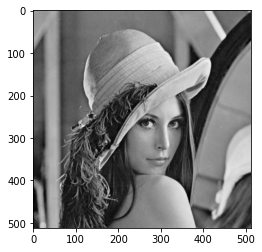

In [69]:
img = Image.open("lena_gray_512.tif").convert('L')
img = np.array(img)

plt.imshow(img, cmap='gray')

## Qn-1(a)
Plotting the log magnitude of
the 2D DFT of the grayscale image, with center shifted.

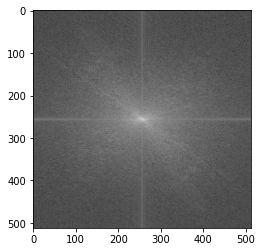

In [70]:
 # Computing DFT
dftImg = doDFT(img)
plt.imshow(np.log(np.abs(dftImg)), cmap='gray')

### Qn1(b)

In [71]:
def createTruncateFilter(n: int,m: int, percent: float) -> np.array:
    """
        Creates a Gaussian filter
        `n,m` : shape of image
        `center`: coordinate of center of image
        `radius`: given radius of image
        `n1`: parameter in filter

        `ret`: HighPass Gaussian filter
    """
    ratio = 100/percent
    center = (n//2, m//2)
    filter = np.zeros((n,m))
    rectX, rectY = (n/(ratio**(0.5)))/2, (m/(ratio**(0.5)))/2
    print(rectX*2, rectY*2)
    for i in range(n):
        for j in range(m):
            filter[i,j] = 1 if (abs(i-center[0])<=rectX and abs(j-center[1])<=rectY) else 0
    
    
    return filter

256.0 256.0


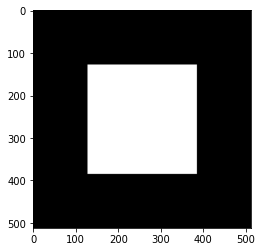

In [72]:
truncateFilter = createTruncateFilter(512, 512, 25)
plt.imshow(truncateFilter, cmap='gray')

In [73]:
def applyMask(img: np.array, mask: np.array) -> np.array:
    """
        Applies mask in frequency domain
    """
    return  np.multiply(img,mask)

/var/folders/6t/jm29wgps6ps94lkqg4dbwppw0000gn/T/ipykernel_14189/2253272546.py:2: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(np.abs(maskedDft)), cmap='gray')


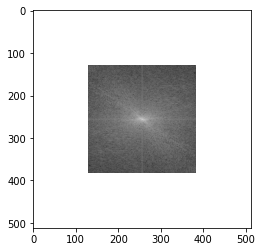

In [74]:
maskedDft = applyMask(dftImg, truncateFilter)
plt.imshow(np.log(np.abs(maskedDft)), cmap='gray')

In [75]:
def doIFT(img: np.array) -> np.array:
    """
        Calculates inverse fourier transform of array
    """
    backIshift = np.fft.ifftshift(img)
    imgFiltered = np.fft.ifft2(backIshift, axes=(0,1))
    return imgFiltered

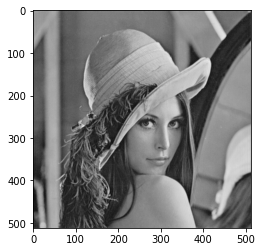

In [76]:
imageReconstructed25 = doIFT(maskedDft)
imageReconstructed25 = np.abs(imageReconstructed25)
plt.imshow( imageReconstructed25, cmap='gray')

Repeating the process for all 12.5, 6.25 

181.01933598375615 181.01933598375615


/var/folders/6t/jm29wgps6ps94lkqg4dbwppw0000gn/T/ipykernel_14189/2199565544.py:3: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(np.abs(maskedDft)), cmap='gray')


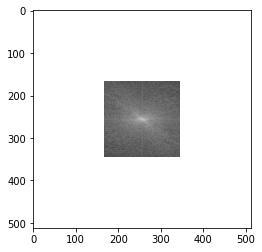

In [77]:
truncateFilter = createTruncateFilter(512, 512, 12.5)
maskedDft = applyMask(dftImg, truncateFilter)
plt.imshow(np.log(np.abs(maskedDft)), cmap='gray')

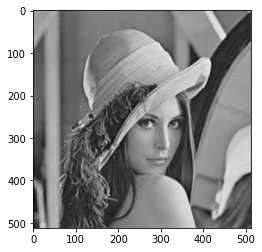

In [78]:
imageReconstructed12_5 = doIFT(maskedDft)
imageReconstructed12_5 = np.abs(imageReconstructed12_5)
plt.imshow(imageReconstructed12_5, cmap='gray')

128.0 128.0


/var/folders/6t/jm29wgps6ps94lkqg4dbwppw0000gn/T/ipykernel_14189/3552557290.py:3: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(np.abs(maskedDft)), cmap='gray')


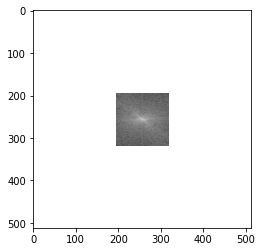

In [79]:
truncateFilter = createTruncateFilter(512, 512, 6.25)
maskedDft = applyMask(dftImg, truncateFilter)
plt.imshow(np.log(np.abs(maskedDft)), cmap='gray')

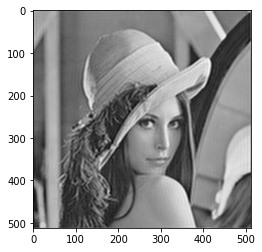

In [80]:
imageReconstructed6_25 = doIFT(maskedDft)
imageReconstructed6_25 = np.abs(imageReconstructed6_25)
plt.imshow(imageReconstructed6_25, cmap='gray')

In [81]:
from math import log10, sqrt


def mseError(original, compressed):
    """
        `returns`: MSE error b/w reference image and converted img
    """
    msErr = np.mean((original - compressed) ** 2)
    return msErr

def PSNR(original, compressed):
    """
        `returns`: PSNR error b/w reference image and converted img
    """
    mse = mseError(original, compressed)
    if(mse == 0):          
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

On printing the SNR values we see the ratio is increasing since we are reducing the effect of prominent signals by reducing coeffiencients

In [82]:
print(PSNR(img,imageReconstructed25))
print(PSNR(img,imageReconstructed12_5))
print(PSNR(img,imageReconstructed6_25))

35.41150420698554
32.1736585482728
29.56577536269142


### Repeating the process for diagram Image

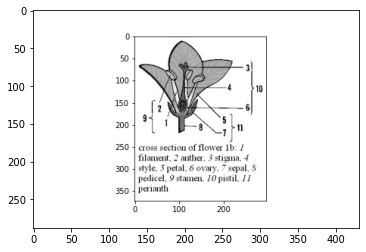

In [85]:
img = Image.open("irisImage.jpg").convert('L')
img = np.array(img)

plt.imshow(img, cmap='gray')

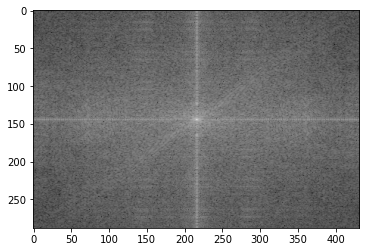

In [86]:
dftImg = doDFT(img)
plt.imshow(np.log(np.abs(dftImg)), cmap='gray')

144.0 216.0


/var/folders/6t/jm29wgps6ps94lkqg4dbwppw0000gn/T/ipykernel_14189/4134578423.py:4: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(np.abs(maskedDft)), cmap='gray')


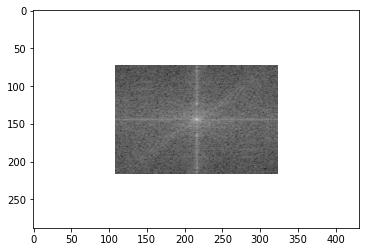

In [87]:
m,n = img.shape
truncateFilter = createTruncateFilter(m, n, 25)
maskedDft = applyMask(dftImg, truncateFilter)
plt.imshow(np.log(np.abs(maskedDft)), cmap='gray')

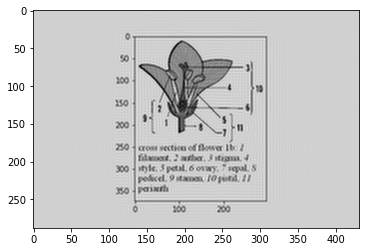

In [88]:
imageReconstructed25 = doIFT(maskedDft)
imageReconstructed25 = np.abs(imageReconstructed25)
plt.imshow( imageReconstructed25, cmap='gray')

101.82337649086284 152.73506473629425


/var/folders/6t/jm29wgps6ps94lkqg4dbwppw0000gn/T/ipykernel_14189/1657769777.py:4: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(np.abs(maskedDft)), cmap='gray')


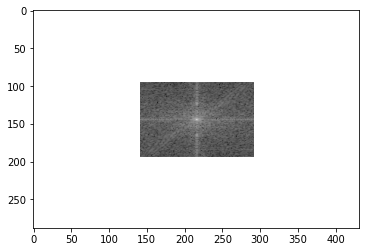

In [89]:
m,n = img.shape
truncateFilter = createTruncateFilter(m, n, 12.5)
maskedDft = applyMask(dftImg, truncateFilter)
plt.imshow(np.log(np.abs(maskedDft)), cmap='gray')

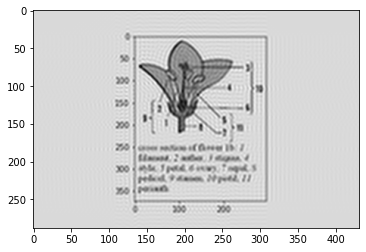

In [90]:
imageReconstructed12_5 = doIFT(maskedDft)
imageReconstructed12_5 = np.abs(imageReconstructed12_5)
plt.imshow( imageReconstructed12_5, cmap='gray')

72.0 108.0


/var/folders/6t/jm29wgps6ps94lkqg4dbwppw0000gn/T/ipykernel_14189/408257973.py:4: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(np.abs(maskedDft)), cmap='gray')


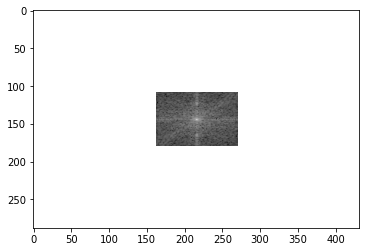

In [91]:
m,n = img.shape
truncateFilter = createTruncateFilter(m, n, 6.25)
maskedDft = applyMask(dftImg, truncateFilter)
plt.imshow(np.log(np.abs(maskedDft)), cmap='gray')

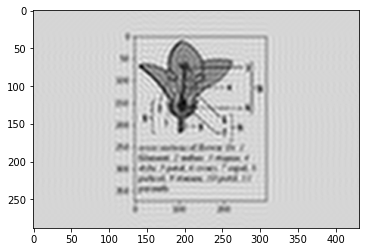

In [92]:
imageReconstructed6_25 = doIFT(maskedDft)
imageReconstructed6_25 = np.abs(imageReconstructed6_25)
plt.imshow( imageReconstructed6_25, cmap='gray')

In [93]:
print(PSNR(img,imageReconstructed25))
print(PSNR(img,imageReconstructed12_5))
print(PSNR(img,imageReconstructed6_25))

22.299051141556752
20.819809385212494
19.892725648439534


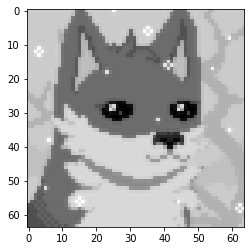

In [94]:
img = Image.open("64x64.webp").convert('L')
img = img.resize((64,64))
img= np.array(img)

## original 64x64 image
plt.imshow(img, cmap='gray')

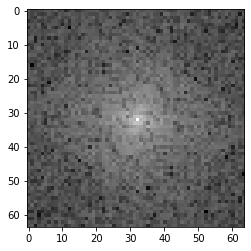

In [95]:
dft64Img = doDFT(img)
plt.imshow(np.log(np.abs(dft64Img)), cmap='gray')

In [96]:
def addPadding(img: np.array)->np.array:
    """
        Adds padding to image
    """
    n, m = img.shape
    padImg = np.zeros((2*n, 2*m))
    padImg[:n, :m] = img
    return padImg

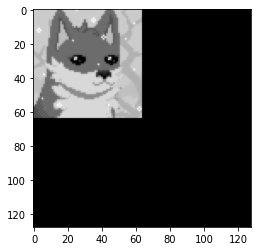

In [97]:
img128 =addPadding(img)
plt.imshow(img128, cmap='gray')

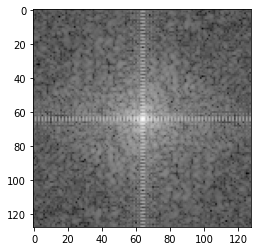

In [98]:
dft128Img = doDFT(img128)
plt.imshow(np.log(np.abs(dft128Img)), cmap='gray')

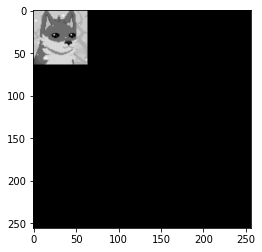

In [99]:
img256 =addPadding(img128)
plt.imshow(img256,cmap='gray')

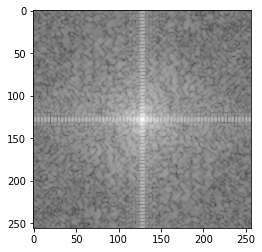

In [100]:
dft256Img = doDFT(img256)
plt.imshow(np.log(np.abs(dft256Img)), cmap='gray')

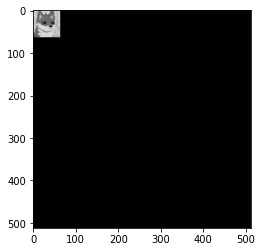

In [101]:
img512 =addPadding(img256)
plt.imshow(img512,cmap='gray')

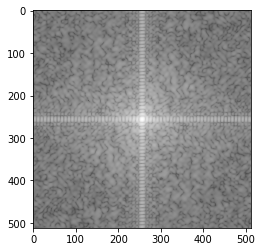

In [102]:
dft512Img = doDFT(img512)
plt.imshow(np.log(np.abs(dft512Img)), cmap='gray')

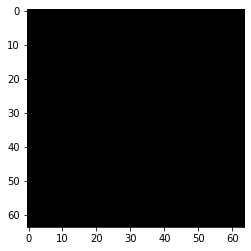

In [103]:
imgAllBlack = np.zeros((64,64))
imgAllBlack[0,0]=1
dftBlack = doDFT(imgAllBlack)
plt.imshow(np.log(np.abs(dftBlack)), cmap='gray')

### Qn3 Notch Filters

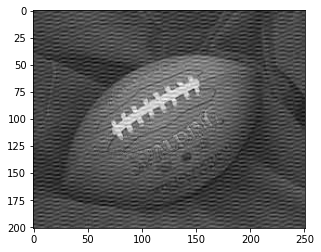

In [116]:
notchImg = Image.open("notch.jpeg").convert('L')
notchImg = np.array(notchImg)
plt.imshow(notchImg, cmap='gray')

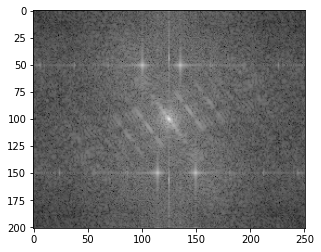

In [117]:
dftNotchImg = doDFT(notchImg)
plt.imshow(np.log(np.abs(dftNotchImg)), cmap='gray')

In [127]:
class NotchFilter:
    def __init__(self, n: int, m: int, centers: tuple, radius: float, n1: int):
        self.n = n
        self.m = m
        self.centers = centers
        self.radius = radius
        self.n1 = n1
        self.filter = np.zeros((n,m))
        self.filter = self.createFilter()
    
    def createFilter(self) -> np.array:
        """
            Creates a Notch filter
            `n,m` : shape of image
            `center`: coordinate of center of image
            `radius`: given radius of image
        """
        centers = self.centers
        filter = np.ones((self.n,self.m))
        d0 = self.radius
        order = self.n1
        for i in range(self.n):
            for j in range(self.m):
                for center in centers:
                    u0 = center[0]
                    v0 = center[1]
                    d1 = pow(pow(i - u0, 2) + pow(j - v0, 2), 0.5)
                    if(d1 <= d0):
                        filter[i,j] *=  0
        return filter

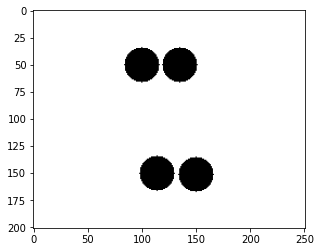

In [151]:
notches = ((50,100), (50,135), (150, 114), (151, 150))
m,n = notchImg.shape
notchFilter = NotchFilter(m, n, notches, 16, 2).filter
plt.imshow(notchFilter, cmap='gray')

/var/folders/6t/jm29wgps6ps94lkqg4dbwppw0000gn/T/ipykernel_14189/2632752629.py:2: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(np.abs(filteredNothImg)), cmap='gray')


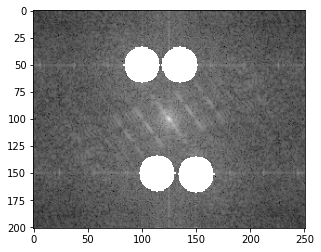

In [152]:
filteredNothImg = applyMask(dftNotchImg, notchFilter)
plt.imshow(np.log(np.abs(filteredNothImg)), cmap='gray')

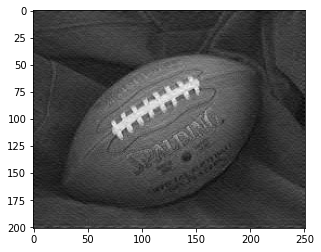

In [153]:
convertedNothImg = doIFT(filteredNothImg)
convertedNothImg = np.abs(convertedNothImg)
plt.imshow(convertedNothImg, cmap='gray')

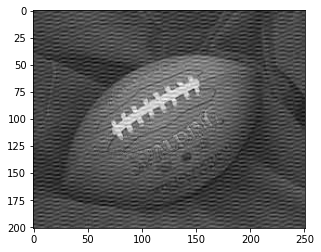

In [141]:
plt.imshow(notchImg, cmap='gray')